In [1]:
import numpy as np
import pandas as pd

In [2]:
#Mount the G Drive to access the data set
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
train_path = '/content/drive/MyDrive/Colab Notebooks/FP-DM/dataset/train_baseline_fix_index.csv'
test_path = '/content/drive/MyDrive/Colab Notebooks/FP-DM/dataset/test_baseline_fix_index.csv'
train_df = pd.read_csv(train_path, encoding= 'unicode_escape')
test_df = pd.read_csv(test_path, encoding= 'unicode_escape')
merged_df = train_df.append([test_df])

In [4]:
train_df.drop(['Unnamed: 0'], inplace=True, axis=1)
train_df

,sentence #,word,tag,word_idx,tag_idx
0,1,Berikut,O,7983,0
1,1,adalah,O,2039,0
2,1,tujuh,O,4980,0
3,1,kota,O,41,0
4,1,di,O,4961,0
...,...,...,...,...,...
30243,1464,kita,O,4705,0
30244,1464,",",O,7275,0
30245,1464,ucap,O,7791,0
30246,1464,Fadli,B-PER,855,4


In [5]:
test_df.drop(['Unnamed: 0'], inplace=True, axis=1)
test_df

,sentence #,word,tag,word_idx,tag_idx
0,1,Meski,O,4549,0
1,1,demikian,O,4487,0
2,1,",",O,7275,0
3,1,ia,O,5670,0
4,1,menegaskan,O,5148,0
...,...,...,...,...,...
18446,509,keluarga,O,3747,0
18447,509,-lah,O,2169,0
18448,509,",",O,7275,0
18449,509,ujarnya,O,3526,0


In [6]:
merged_df.drop(['Unnamed: 0'], inplace=True, axis=1)
merged_df

,sentence #,word,tag,word_idx,tag_idx
0,1,Berikut,O,7983,0
1,1,adalah,O,2039,0
2,1,tujuh,O,4980,0
3,1,kota,O,41,0
4,1,di,O,4961,0
...,...,...,...,...,...
18446,509,keluarga,O,3747,0
18447,509,-lah,O,2169,0
18448,509,",",O,7275,0
18449,509,ujarnya,O,3526,0


In [7]:
# importing the module
import json
 
# Opening JSON file
def loadJSON(filename):
  data = {}
  with open(filename) as json_file:
      data = json.load(json_file)
  return data

In [8]:
idx2tag = loadJSON('/content/drive/MyDrive/Colab Notebooks/FP-DM/output/idx2tag.json')
tag2idx = loadJSON('/content/drive/MyDrive/Colab Notebooks/FP-DM/output/tag2idx.json')
token2idx = loadJSON('/content/drive/MyDrive/Colab Notebooks/FP-DM/output/token2idx.json')
idx2token = loadJSON('/content/drive/MyDrive/Colab Notebooks/FP-DM/output/idx2token.json')
print(idx2tag)

{'0': 'O', '1': 'I-LOC', '2': 'B-ORG', '3': 'I-PER', '4': 'B-PER', '5': 'I-ORG', '6': 'B-LOC'}


In [9]:
tag2idx = dict([key, int(value)] for key, value in tag2idx.items())
token2idx = dict([key, int(value)] for key, value in token2idx.items())
idx2tag = dict([int(key), value] for key, value in idx2tag.items())
idx2token = dict([int(key), value] for key, value in idx2token.items())
tag2idx

{'B-LOC': 6,
 'B-ORG': 2,
 'B-PER': 4,
 'I-LOC': 1,
 'I-ORG': 5,
 'I-PER': 3,
 'O': 0}

In [10]:
# Groupby and collect columns
train_group = train_df.groupby(['sentence #'], as_index=False)['word', 'tag', 'word_idx', 'tag_idx'].agg(lambda x: list(x))
test_group = test_df.groupby(['sentence #'], as_index=False)['word', 'tag', 'word_idx', 'tag_idx'].agg(lambda x: list(x))
merged_group = merged_df.groupby(['sentence #'], as_index=False)['word', 'tag', 'word_idx', 'tag_idx'].agg(lambda x: list(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


In [11]:
train_group

,sentence #,word,tag,word_idx,tag_idx
0,1,"[Berikut, adalah, tujuh, kota, di, Indonesia, ...","[O, O, O, O, O, B-LOC, O, O, O, O, O, O, O]","[7983, 2039, 4980, 41, 4961, 1745, 5214, 5262,...","[0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0]"
1,2,"[Soal, calon, presiden, itu, urusan, nanti, ,,...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, B-P...","[3711, 8327, 3000, 5216, 4847, 865, 7275, 5214...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, ..."
2,3,"[Kalau, itu, tanya, PPP, saja, ,, ujar, Nasir,...","[O, O, O, B-ORG, O, O, O, B-PER, O, O, O, O, O...","[5035, 5216, 5722, 7446, 5829, 7275, 5990, 108...","[0, 0, 0, 2, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, ..."
3,4,"[Jokowi, bisa, mengatakan, mencabut, pengaduan...","[B-PER, O, O, O, O, O, O, O, O, O, O]","[8234, 3106, 3220, 2834, 4775, 652, 3257, 2096...","[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,5,"[Akbar, menyebutkan, pemerintahan, Jokowi-JK, ...","[B-PER, O, O, O, O, O, O, O, O, O, O, O, O, O,...","[4662, 5284, 5706, 3052, 6288, 2366, 7513, 268...","[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...
1459,1460,"[Dia, menggantikan, Ian, Campbell, ,, yang, di...","[O, O, B-PER, I-PER, O, O, O, O, O, O, O, O, O...","[7122, 3901, 2733, 1094, 7275, 5214, 5571, 445...","[0, 0, 4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1460,1461,"[Kita, siapkan, strategi, baru, ,, bukan, gant...","[O, O, O, O, O, O, O, O, O, O, O]","[5581, 5206, 2338, 7187, 7275, 3022, 7872, 527...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1461,1462,"[September, 2007, PTBA, akan, mensosialisasika...","[O, O, B-ORG, O, O, O, O, O, O, O, O, O, O, O,...","[1820, 9, 8170, 607, 1804, 5973, 1372, 2594, 4...","[0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1462,1463,"[Sedang, infeksi, virus, ebola, ini, berlangsu...","[O, O, O, O, O, O, O, O, O, O, O, O, O]","[2118, 8069, 1844, 4255, 452, 3596, 7595, 652,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [13]:
def get_pad(dataset_grouped, merged_data, maxlen):

    #get max token and tag length
    n_token = len(list(set(merged_data['word'].to_list())))
    n_tags = len(list(set(merged_data['tag'].to_list())))

    #Pad tokens (X var)    
    tokens = dataset_grouped['word_idx'].tolist()
    # maxlen = max([len(s) for s in tokens])
    pad_tokens = pad_sequences(tokens, maxlen=maxlen, dtype='int32', padding='post', value= token2idx["ENDPAD"])

    #Pad Tags (y var) and convert it into one hot encoding
    tags = dataset_grouped['tag_idx'].tolist()
    pad_tags = pad_sequences(tags, maxlen=maxlen, dtype='int32', padding='post', value= tag2idx["O"])
    pad_tags = [to_categorical(i, num_classes=n_tags) for i in pad_tags]

    return pad_tokens, pad_tags, n_token

In [14]:
train_tokens, train_tags, n_token = get_pad(train_group, merged_df, 60)
test_tokens,  test_tags, _ = get_pad(test_group, merged_df, 60)
train_tags = np.array(train_tags)
test_tags = np.array(test_tags)
print('train_tags: ',train_tags.shape,'test_tags: ',test_tags.shape)

train_tags:  (1464, 60, 7) test_tags:  (509, 60, 7)


In [15]:
from sklearn.utils import class_weight

train_temp_tags = np.ravel(np.argmax(train_tags, axis=-1))
print(len(train_temp_tags))

87840


In [16]:
class_weights = class_weight.compute_class_weight(
    class_weight ='balanced', 
    classes = np.unique(train_temp_tags), 
    y = train_temp_tags
    )
class_weight_dict = dict(enumerate(class_weights))
print(class_weight_dict)

train_label = np.argmax(train_tags, axis=-1)
print(train_tokens.shape)
print(train_label.shape)

{0: 0.1488172888281994, 1: 48.07881773399015, 2: 17.428571428571427, 3: 25.82010582010582, 4: 14.005102040816327, 5: 21.785714285714285, 6: 21.672834937083643}
(1464, 60)
(1464, 60)


In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, Input, SpatialDropout1D
from tensorflow.keras.utils import plot_model
from tensorflow import keras

In [18]:
input_dim = n_token+1
output_dim = 100
input_length = 60
n_tags = 7

In [19]:
def get_lstm_model():
    model = Sequential()
    model.add(Embedding(input_dim=input_dim, output_dim=output_dim, input_length=input_length, name="embedding"))
    model.add(LSTM(units=output_dim, return_sequences=True, dropout=0.5, recurrent_dropout=0.5))
    model.add(Dropout(0.5))
    model.add(Dense(n_tags, activation="softmax"))

    opt = keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    model.summary()
    
    return model

In [20]:
print(class_weight_dict)
sample_weights = np.ones(shape=(len(train_label), train_label.shape[-1]))
for i in range(17):
    sample_weights[train_label == i] = class_weight_dict.get(i)
print(sample_weights.shape)

{0: 0.1488172888281994, 1: 48.07881773399015, 2: 17.428571428571427, 3: 25.82010582010582, 4: 14.005102040816327, 5: 21.785714285714285, 6: 21.672834937083643}
(1464, 60)


In [21]:
nlp_model = get_lstm_model()
plot_model(nlp_model)
his = nlp_model.fit(train_tokens, train_label , batch_size = 64, epochs=25, validation_split=0.2, sample_weight = sample_weights)
tf.keras.models.save_model(nlp_model, filepath  = '/content/drive/MyDrive/Colab Notebooks/FP-DM/model/LSTM_baseline_new.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 60, 100)           854300    
                                                                 
 lstm (LSTM)                 (None, 60, 100)           80400     
                                                                 
 dropout (Dropout)           (None, 60, 100)           0         
                                                                 
 dense (Dense)               (None, 60, 7)             707       
                                                                 
Total params: 935,407
Trainable params: 935,407
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
19/19 [==============================] - 7s 220ms/step - loss: 1.6389 - accuracy: 0.6968 - val_loss: 1.2441 - val_accuracy: 0.7993
Epoch 2/25
19/19 [======================

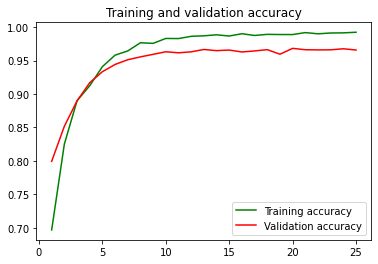

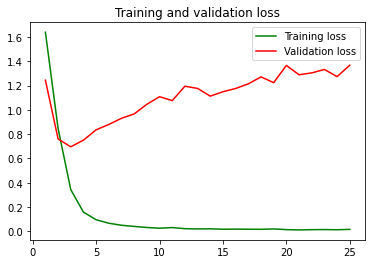

In [22]:
# Plot results
import matplotlib.pyplot as plt

accuracy = his.history['accuracy']
val_acc = his.history['val_accuracy']
loss = his.history['loss']
val_loss = his.history['val_loss']

epochs = range(1, len(accuracy)+1)

plt.plot(epochs, accuracy, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [46]:
nlp_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/FP-DM/model/LSTM_baseline_new.h5')

y_test = np.argmax(test_tags, axis=-1)
print(test_tokens.shape,y_test.shape)
nlp_model.evaluate(test_tokens, y_test)

(509, 60) (509, 60)
16/16 [==============================] - 1s 23ms/step - loss: 0.2578 - accuracy: 0.9486


[0.25782111287117004, 0.9485592842102051]

In [47]:
y_pred = nlp_model.predict(test_tokens)
y_pred = np.argmax(y_pred, axis= -1)

In [48]:
y_test_list = []
y_pred_list = []
for row in range(0, y_test.shape[0]):
  y_pred_list = np.concatenate((y_pred_list, y_pred[row]), axis=0)
  y_test_list = np.concatenate((y_test_list, y_test[row]), axis=0)

In [49]:
data_prediction = pd.DataFrame({'actual_class': y_test_list, 'predicted_class': y_pred_list})
data_prediction['actual_class'] = data_prediction['actual_class'].map(idx2tag)
data_prediction['predicted_class'] = data_prediction['predicted_class'].map(idx2tag)
data_prediction

,actual_class,predicted_class
0,O,O
1,O,O
2,O,O
3,O,O
4,O,O
...,...,...
30535,O,O
30536,O,O
30537,O,O
30538,O,O


In [50]:
confusion_matrix = pd.crosstab(data_prediction['predicted_class'], data_prediction['actual_class'])
confusion_matrix

actual_class,B-LOC,B-ORG,B-PER,I-LOC,I-ORG,I-PER,O
predicted_class,,,,,,,
B-LOC,232,15,14,14,6,4,238
B-ORG,5,489,33,2,19,28,313
B-PER,1,3,423,1,1,34,56
I-LOC,5,5,6,128,20,12,131
I-ORG,0,6,27,3,323,19,139
I-PER,0,0,5,3,2,185,28
O,10,62,212,8,37,44,27189


In [51]:
from sklearn.metrics import classification_report
pd.DataFrame(classification_report(data_prediction['actual_class'], data_prediction['predicted_class'], labels=['O', 'I-LOC', 'B-ORG', 'I-PER', 'B-PER', 'I-ORG', 'B-LOC'], output_dict=True)).T

,precision,recall,f1-score,support
O,0.986467,0.967787,0.977038,28094.000000
I-LOC,0.416938,0.805031,0.549356,159.000000
B-ORG,0.550056,0.843103,0.665759,580.000000
I-PER,0.829596,0.567485,0.673953,326.000000
B-PER,0.815029,0.587500,0.682809,720.000000
I-ORG,0.624758,0.791667,0.698378,408.000000
B-LOC,0.443595,0.916996,0.597938,253.000000
accuracy,0.948559,0.948559,0.948559,0.948559
macro avg,0.666634,0.782796,0.692176,30540.000000
weighted avg,0.960168,0.948559,0.951864,30540.000000


Bagaimana jika data padding diabaikan saat menghitung confusion matrix?

In [52]:
y_pred_list = y_pred.tolist()
y_test_list = y_test.tolist()

In [53]:
# Clean the test and pred data from padding data
clean_pred = []
clean_test = []
for row in range(0, test_tokens.shape[0]):
  # print(row, test_tokens[row])
  pad_list = []
  for i in range(0, len(test_tokens[row])):
    if(test_tokens[row][i] == token2idx['ENDPAD']):
      pad_list.append(i)

  pad_list.sort(reverse=True)
  for idx in pad_list:
  #   clean_pred[row] = clean_pred[row] + np.delete(y_pred[row], idx)
  #   clean_test[row] = clean_test[row] + np.delete(y_test[row], idx)
    y_pred_list[row].pop(idx)
    y_test_list[row].pop(idx)

In [54]:
y_test_rows = []
y_pred_rows = []
for row in range(0, y_test.shape[0]):
  # y_pred_list = y_pred_list + y_pred[row]
  y_test_rows = np.concatenate((y_test_rows, y_test_list[row]), axis=0)
  y_pred_rows = np.concatenate((y_pred_rows, y_pred_list[row]), axis=0)

In [55]:
data_prediction = pd.DataFrame({'actual_class': y_test_rows, 'predicted_class': y_pred_rows})
data_prediction['actual_class'] = data_prediction['actual_class'].map(idx2tag)
data_prediction['predicted_class'] = data_prediction['predicted_class'].map(idx2tag)
data_prediction

,actual_class,predicted_class
0,O,O
1,O,O
2,O,O
3,O,O
4,O,O
...,...,...
17985,O,O
17986,O,O
17987,O,O
17988,O,O


In [56]:
confusion_matrix = pd.crosstab(data_prediction['predicted_class'], data_prediction['actual_class'])
confusion_matrix

actual_class,B-LOC,B-ORG,B-PER,I-LOC,I-ORG,I-PER,O
predicted_class,,,,,,,
B-LOC,232,15,14,14,6,4,238
B-ORG,5,489,33,2,19,28,313
B-PER,1,3,423,1,1,34,56
I-LOC,5,5,6,128,20,12,131
I-ORG,0,6,27,3,323,19,139
I-PER,0,0,5,3,2,185,28
O,10,62,212,8,37,44,14639


In [57]:
pd.DataFrame(classification_report(data_prediction['actual_class'], data_prediction['predicted_class'], labels=['O', 'I-LOC', 'B-ORG', 'I-PER', 'B-PER', 'I-ORG', 'B-LOC'], output_dict=True)).T

,precision,recall,f1-score,support
O,0.975153,0.941778,0.958175,15544.000000
I-LOC,0.416938,0.805031,0.549356,159.000000
B-ORG,0.550056,0.843103,0.665759,580.000000
I-PER,0.829596,0.567485,0.673953,326.000000
B-PER,0.815029,0.587500,0.682809,720.000000
I-ORG,0.624758,0.791667,0.698378,408.000000
B-LOC,0.443595,0.916996,0.597938,253.000000
accuracy,0.912674,0.912674,0.912674,0.912674
macro avg,0.665018,0.779080,0.689481,17990.000000
weighted avg,0.932046,0.912674,0.918005,17990.000000
